In [1]:
import pandas as pd
import numpy as np
import random
import pyttsx3
import ipywidgets as widgets
import csv
import numpy as np
import math as math
import ipympl
import statistics
from mpl_toolkits.mplot3d import axes3d

In [2]:
#pip install ipympl

In [3]:
mat=np.zeros((100,3))

In [4]:
save = np.array([1,2,3])

In [5]:
mat[0,]=save

In [6]:
mat[0,]

array([1., 2., 3.])

In [7]:
cov = [[1,1,1],
       [1,1,1],
       [1,1,1]]

In [8]:
cov

[[1, 1, 1], [1, 1, 1], [1, 1, 1]]

In [9]:
def collapsedgibbs3NormV(n, rho, x, y, z):
    mat = mat=np.zeros((n,3))
    mat[0, ] = np.array([x,y,z])
    for i in range(1,n):
        x = int(10*np.random.normal(rho * y, math.sqrt(rho+rho**3), 1))/10
        y = int(10*np.random.normal(rho * x, math.sqrt(rho+rho**3), 1))/10
        z = int(10*np.random.normal(rho * x + rho * y, math.sqrt(rho+rho**3), 1))/10
        mat[i, ] = [x*100,y,z]
    return(mat)

In [10]:
save = collapsedgibbs3NormV(100, 0.9, 500, 24, 0.2)

In [11]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [12]:
save[1]

array([2090. ,   19.4,   36. ])

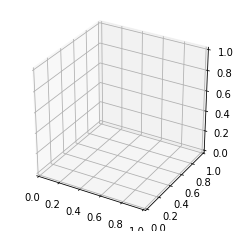

In [13]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')



<IPython.core.display.Javascript object>


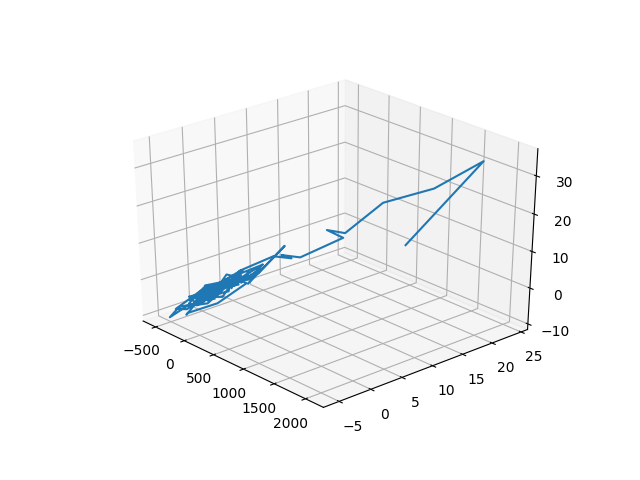

In [16]:
%matplotlib notebook
xs = np.full([100,1], None)
ys = np.full([100,1], None)
zs = np.full([100,1], None)
for i in range(0,len(save)):
    points = list(save[i])

    xs[i] = points[0]
    ys[i] = points[1]
    zs[i] = points[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a basic wireframe.
ax.plot_wireframe(xs, ys, zs, rstride=10, cstride=10)

plt.show()

In [39]:
an_array

array([[None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [None],
       [No

In [51]:
xs = [None] * len(save)

In [ ]:
xs

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [41]:
save

array([[ 5.00e+02,  2.40e+01,  2.00e-01],
       [ 2.26e+03,  1.87e+01,  3.55e+01],
       [ 1.83e+03,  1.74e+01,  3.26e+01],
       ...,
       [-2.20e+02, -1.50e+00, -4.10e+00],
       [-3.00e+02, -2.10e+00, -6.60e+00],
       [-9.00e+01,  2.00e-01,  3.00e-01]])

In [36]:
list1 = list(save[0])

In [38]:
list1[1]

24.0

In [23]:
save

array([[ 5.00e+02,  2.40e+01,  2.00e-01],
       [ 2.26e+03,  1.87e+01,  3.55e+01],
       [ 1.83e+03,  1.74e+01,  3.26e+01],
       ...,
       [-2.20e+02, -1.50e+00, -4.10e+00],
       [-3.00e+02, -2.10e+00, -6.60e+00],
       [-9.00e+01,  2.00e-01,  3.00e-01]])

In [8]:
save

array([[ 5.00e+02,  2.40e+01,  2.00e-01],
       [ 2.26e+03,  1.87e+01,  3.55e+01],
       [ 1.83e+03,  1.74e+01,  3.26e+01],
       ...,
       [-2.20e+02, -1.50e+00, -4.10e+00],
       [-3.00e+02, -2.10e+00, -6.60e+00],
       [-9.00e+01,  2.00e-01,  3.00e-01]])

In [20]:
save

array([[  1. ,   2. ,   3. ],
       [-90. ,  -2.1,  -2. ]])

In [21]:
save[1,2]

-2.0

In [22]:
math.sqrt(0.9 + 0.9**3)

1.2763228431709588

In [23]:
save = open("lyricsdata.csv")

In [24]:
csvreader = csv.reader(save)

In [25]:
header = []
header = next(csvreader)

In [26]:
df = pd.DataFrame(index=np.arange(8031), columns=np.arange(1))

In [27]:
rows = []
for row in csvreader:
        rows.append(row)

In [28]:
rows[2][0] = rows[2][0][1:]

In [29]:
str1 = ''.join(rows[2])

In [30]:
engine = pyttsx3.init()

In [31]:
engine.say(str1)
engine.runAndWait();

In [32]:
rate = engine.getProperty("rate")

In [33]:
voices = engine.getProperty("voices")

In [34]:
engine = pyttsx3.init()
engine.say('The quick brown fox jumped over the lazy dog.', 'fox')
engine.runAndWait();
engine.startLoop(False)
# engine.iterate() must be called inside externalLoop()
def externalLoop():
    for i in range(1, 3):
            engine = pyttsx3.init()
            rows[i][0] = rows[i][0][1:]
            str1 = ''.join(rows[i])  
externalLoop()
engine.endLoop()

In [35]:
def text_to_speech(numberOfLines = 1, startingPoint = 1, rho = 0.9, x = 300, y = 0, z = 0):
    engine = pyttsx3.init()
    engine.setProperty("volume", z)
    engine.setProperty("voice", voices[y].id)
    engine.setProperty("rate", x)
    if(z !=0):
        sample = collapsedgibbs3NormV(numberOfLines, rho, x, y, z)
        print(sample)
        for i in range(startingPoint, startingPoint + len(sample)):
            engine = pyttsx3.init()
            rows[i][0] = rows[i][0][1:]
            str1 = ''.join(rows[i])
            if(abs(sample[i-startingPoint,0]) >= 200 and abs(sample[i-startingPoint,0]) <= 1000):
                engine.setProperty("rate", abs(sample[i-startingPoint,0]))
            else:
                engine.setProperty("rate", 500)
#            engine.setProperty("voice", voices[int(sample[i-startingPoint,1])].id)
            if(abs(sample[i-startingPoint,2]) <= 1):
                engine.setProperty("volume", sample[i-startingPoint,2])
            else:
                engine.setProperty("volume", 0.5)
            engine.say(str1)
            engine.runAndWait(); 
            engine.stop()

In [36]:
text_to_speech(-400, -0.2, -47)

In [37]:
widgets.interact(text_to_speech, numberOfLines = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                 startingPoint = (1,8020,1), rho =(-0.99,0.99,0.01), x= (-900, 900, 10), y = (-47,47,1), z = (-1,1,0.1));





interactive(children=(Dropdown(description='numberOfLines', index=1, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10…

In [38]:
# if needed:
# engine.endLoop()

In [39]:
pip install pyaudio

Note: you may need to restart the kernel to use updated packages.


In [57]:
import re
import wave
import pyaudio
import _thread
import time

class TextToSpeech:
    
    CHUNK = 1024
    def __init__(self, words_pron_dict:str = 'cmudict-0.7b.txt'):
        self._l = {}
        self._load_words(words_pron_dict)

    def _load_words(self, words_pron_dict:str):
        with open(words_pron_dict, 'r') as file:
            for line in file:
                 if not line.startswith(';;;'):
                        key, val = line.split('  ',2)
                        self._l[key] = re.findall(r"[A-Z]+",val)

    def get_pronunciation(self, str_input):
        list_pron = []
        for word in re.findall(r"[\w']+",str_input.upper()):
            if word in self._l:
                list_pron += self._l[word]
        print(list_pron)
        delay=0
        for pron in list_pron:
            _thread.start_new_thread( TextToSpeech._play_audio, (pron,delay,))
            delay += 0.145

    def _play_audio(sound, delay):
        try:
            time.sleep(delay)
            wf = wave.open("sounds/"+sound+".wav", "rb")
            p = pyaudio.PyAudio()
            stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                            channels=wf.getnchannels(),
                            rate=wf.getframerate(),
                            output=True)

            data = wf.readframes(TextToSpeech.CHUNK)

            while data:
                stream.write(data)
                data = wf.readframes(TextToSpeech.CHUNK)

            stream.stop_stream()
            stream.close()

            p.terminate()
            return
        except:
            pass
    

if __name__ == '__main__':
    tts = TextToSpeech()
    while True:
        tts.get_pronunciation(input('Enter a word or phrase: '))

Enter a word or phrase:  hello


['HH', 'AH', 'L', 'OW']


Enter a word or phrase:  hello


['HH', 'AH', 'L', 'OW']


Enter a word or phrase:  hi


['HH', 'AY']


Enter a word or phrase:  yay


['Y', 'EY']


Enter a word or phrase:  word


['W', 'ER', 'D']


Enter a word or phrase:  what is up


['W', 'AH', 'T', 'IH', 'Z', 'AH', 'P']


Enter a word or phrase:  call that wine and dine


['K', 'AO', 'L', 'DH', 'AE', 'T', 'W', 'AY', 'N', 'AH', 'N', 'D', 'D', 'AY', 'N']


Enter a word or phrase:  yer


['Y', 'ER']


KeyboardInterrupt: Interrupted by user